## Лабораторная работа № 3.6.1(150)
### "Спектральный анализ электрических сигналов."

**Цель работы:** изучение спектрального состава периодических электрических сигналов.

**В работе используются:** анализатор спектра, генератор прямоугольных импульсов, генератор сигналов специальной формы, осциллограф.

**Рабочие формулы**: 1) $f_{повт} = \frac{2\pi}{T}$ - частота повторения сигнала, где $T$ - период повторения импульсов; 2) $\Delta \nu = \frac{\Delta \omega}{2\pi}$, где $\Delta \omega$ - ширина спектра (расстояние от главного максимума до первого нуля огибающей); 3) $m = \frac{A_{max} - A_{min}}{A_{max} + A_{min}}$ - глубина модуляции.

**Схема установки и описание работы**: https://mipt.ru/education/chair/physics/S_III/lab_el/new%203.6.1(150)_%D0%A1%D0%BF%D0%B5%D0%BA%D1%82%D1%80%D0%B0%D0%BB%D1%8C%D0%BD%D1%8B%D0%B9%20%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7.pdf

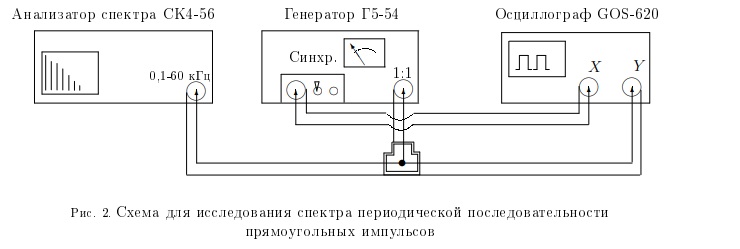
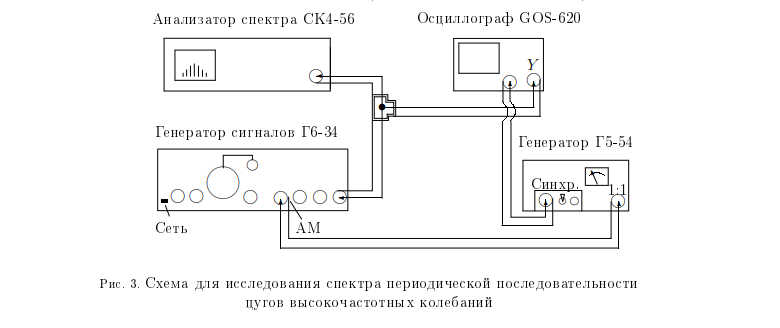
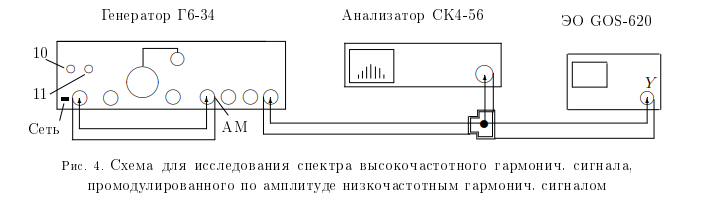

### Задание № 1
**Исследование спектра периодической последовательности прямоугольных импульсов**

1.1) Пусть $\tau = 25\ мкс$ - длительность каждого импульса, $f_{повт} = 1 кГц$, $m_x = 5\ КГц/дел$ - частотный масштаб. Проанализируем, как меняется спектр: а) при увеличении $\tau$ в два раза; б) при увеличении $f_{повт}$ в два раза. (Измерим $\Delta \nu$ и $\delta \nu$).


In [2]:
import pandas as pd

𝜏 = pd.Series([25, 50, 25])
f = pd.Series([1, 1, 2])
delta_nu = pd.Series([1 / (21 / 4), 1 / (11 / 2), 1 / (13 / 5)])
Delta_nu = pd.Series([7, 3.5, 7])

# Зависимость ширины спектра от длительности импульса
table1 = pd.DataFrame({
    "𝜏, μs": 𝜏,
    "f, kHz" : f,
    "𝛿𝜈, divisions" : delta_nu,
    "Δ𝜈, divisions" : Delta_nu
})

print(table1)

   𝜏, μs  f, kHz  𝛿𝜈, divisions  Δ𝜈, divisions
0     25       1       0.190476            7.0
1     50       1       0.181818            3.5
2     25       2       0.384615            7.0


1.2) Проведём измерение зависимости ширины спектра от длительности импульса.

1.3) Калька с огибающими спектров при a) $\tau = 50\ мкс$ и б) $\tau = 100\ мкс$ и график $\Delta \nu(\frac{1}{\tau})$ приведены ниже.

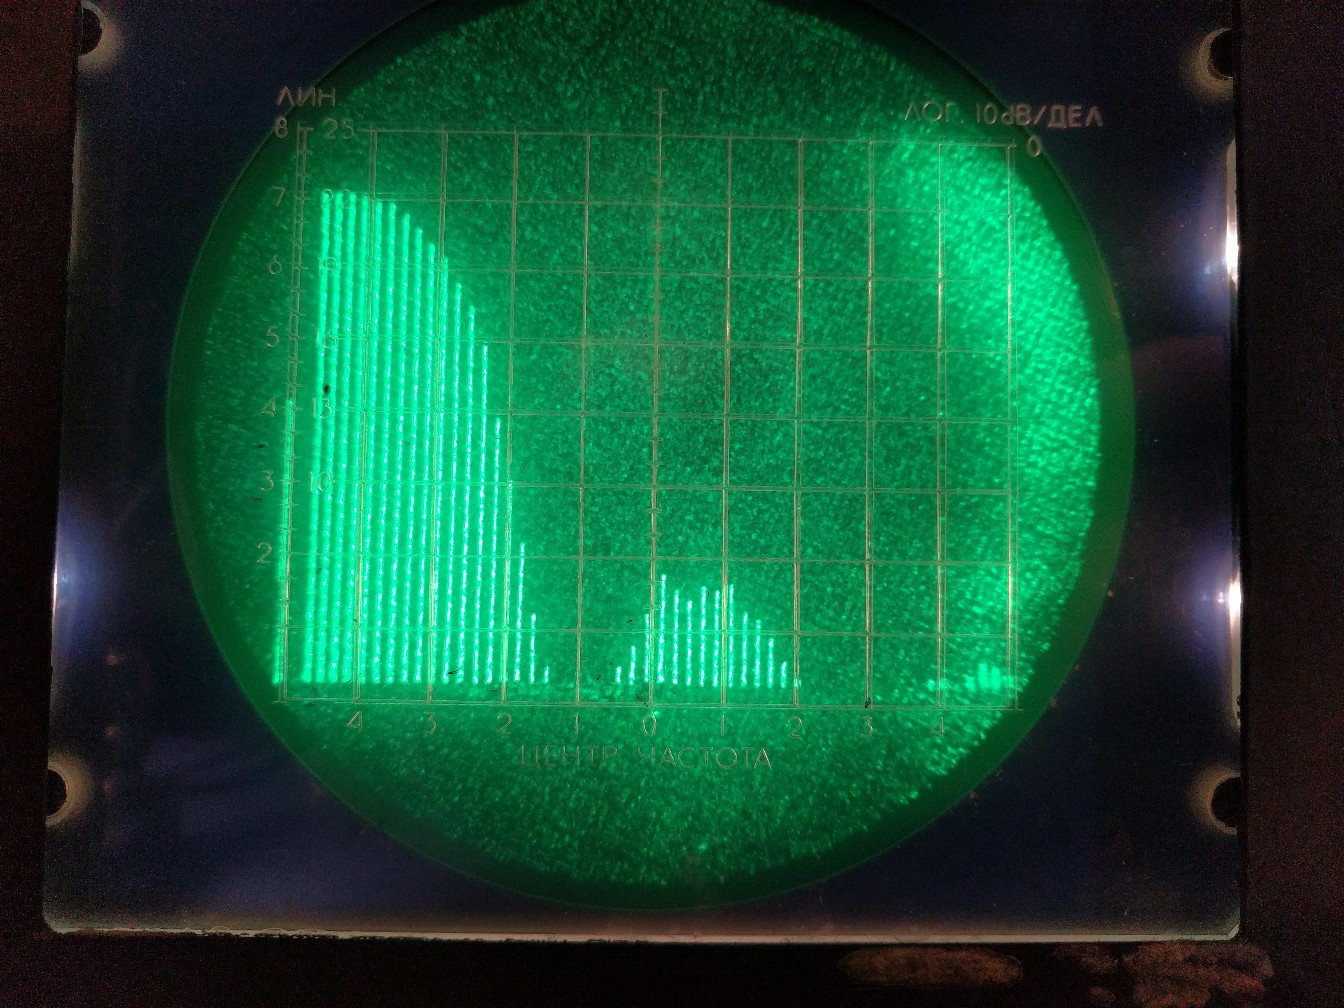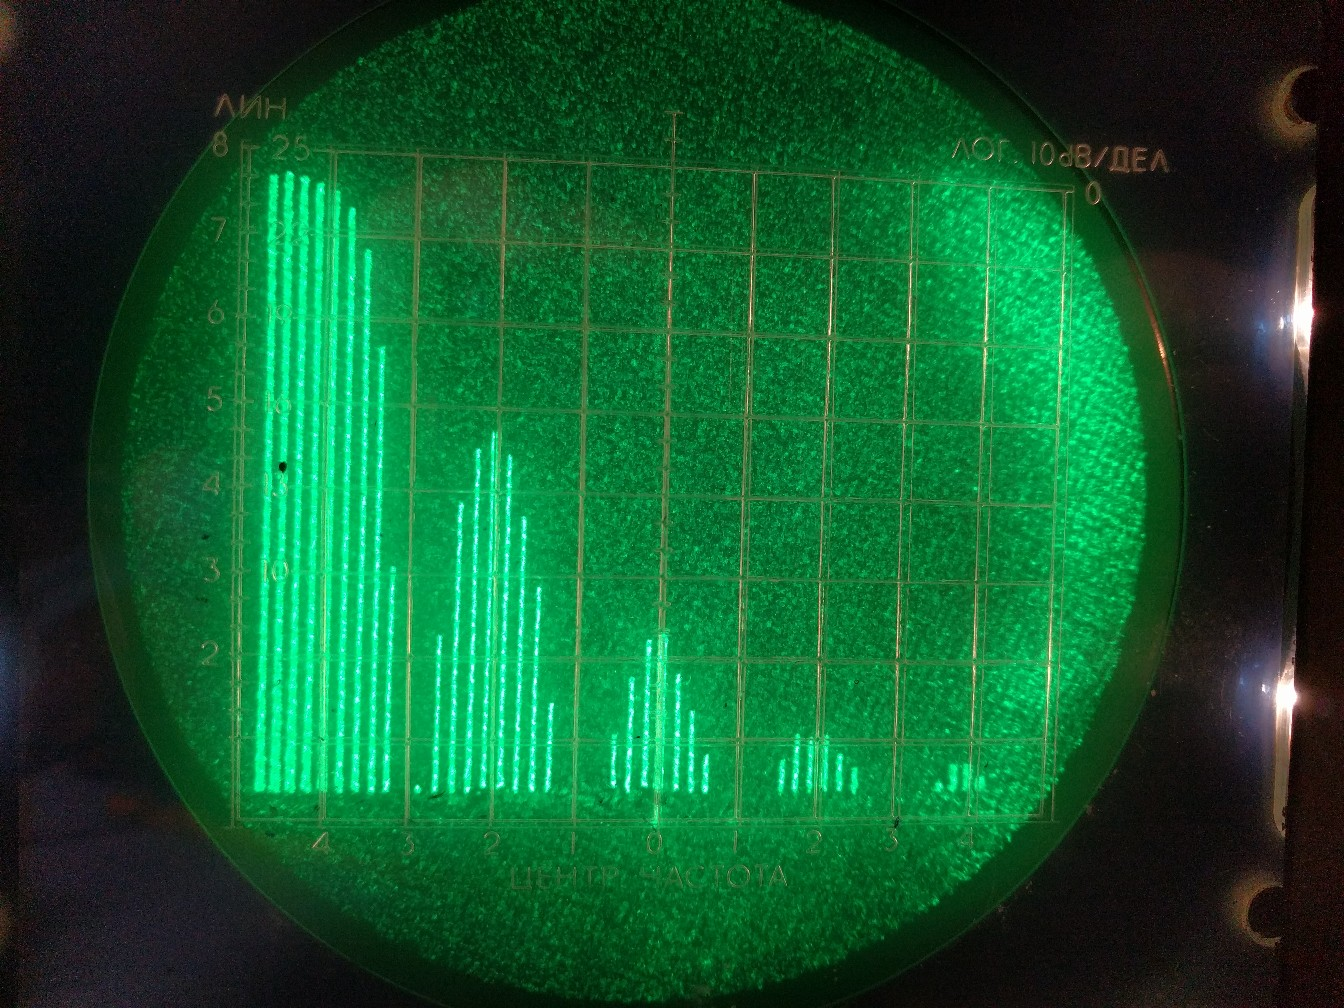

   𝜏, μs   Δ𝜈, Hz
0     25  35000.0
1     50  17500.0
2     75  12000.0
3    100   9500.0
4    125   7000.0
5    150   5500.0
6    175   5000.0
7    200   4000.0


<ErrorbarContainer object of 3 artists>

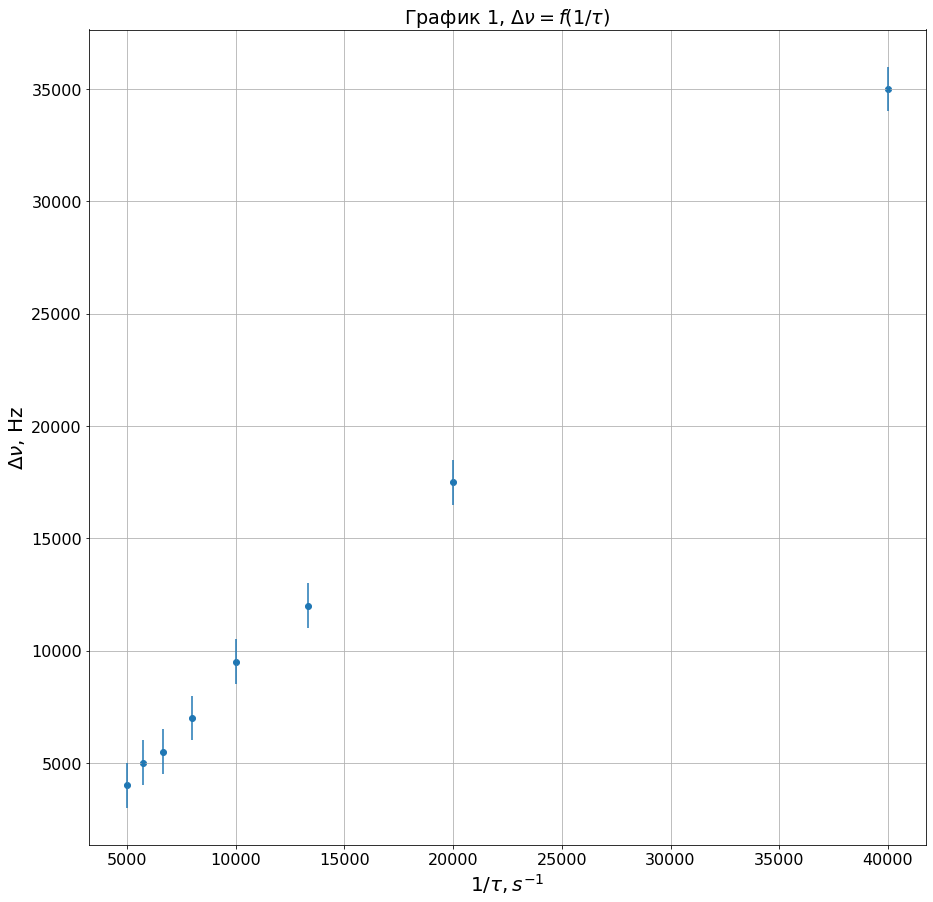

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

np.set_printoptions(precision=8)

m = 5000
𝜏 = pd.Series([25, 50, 75, 100, 125, 150, 175, 200])
Delta_nu = m * pd.Series([7, 3.5, 2.4, 1.9, 1.4, 1.1, 1, 0.8])

# Зависимость ширины спектра от длительности импульса
table1 = pd.DataFrame({
    '𝜏, μs': 𝜏,
    'Δ𝜈, Hz' : Delta_nu
})

print(table1)

mpl.rcParams['font.size'] = 16 # Change size font.
# Create figure.
plt.figure(figsize=(15, 15))

# Sign axises and the graph.
plt.title('График 1, $\Delta ν = f(1/τ)$')
plt.ylabel("$\Delta ν$, Hz", fontsize = 20)
plt.xlabel("$1/τ, s^{-1}$", fontsize = 20)

x = [1 for i in range(len(𝜏))]
x /= 𝜏
plt.scatter(10**6 * x, Delta_nu)

# Activate grid.
plt.grid(b=True, which='major', axis='both', alpha=1)

# Calculate errors.
sigma_Delta_nu = [m * 0.2 for i in range(len(Delta_nu))]

plt.errorbar(10**6 * x, Delta_nu, yerr=sigma_Delta_nu, xerr=0.0, fmt='.') 

**Вывод**: Видим, что зависимость прямо пропорциональная, поэтому соттношение неопредлённостей не выполняется.

### Задание № 2
**Исследование спектра периодической последовательности цугов гармонических колебаний**

2.1) Пусть $\nu_0 = 25\ КГц$ - несущая частота. Проанализируем, как меняется спектр: а) при увеличении $\tau$ в два раза; б) при увеличении $\nu_0$ в два раза. (Измерим $\Delta \omega$ и $\delta \omega$).

In [14]:
𝜏 = pd.Series([50, 100, 100])
f = pd.Series([1, 1, 1])
𝜈 = pd.Series([25, 25, 40])
delta_omega = pd.Series([1 / (16 / 3), 1 / (11 / 2), 1 / (12 / 2)])
Delta_omega = pd.Series([7, 4, 4])

# Зависимость ширины спектра от длительности импульса
table2 = pd.DataFrame({
    "𝜏, μs": 𝜏,
    "f, kHz" : f,
    "𝜈, kHz" : 𝜈,
    "𝛿𝜔, divisions" : delta_omega,
    "Δ𝜔, divisions" : Delta_omega
})

print(table2)

   𝜏, μs  f, kHz  𝜈, kHz  𝛿𝜔, divisions  Δ𝜔, divisions
0     50       1      25       0.187500              7
1    100       1      25       0.181818              4
2    100       1      40       0.166667              4


2.2) Проведём измерение зависимости ширины спектра от частоты повторения в диапазоне $1 - 5\ КГц$.

2.3) Калька с огибающими спектров при a) $f_{повт} = 1\ КГц$ и б) $f_{повт} = 2\ КГц$ и график $\delta \nu(f_{повт})$ приведены ниже.

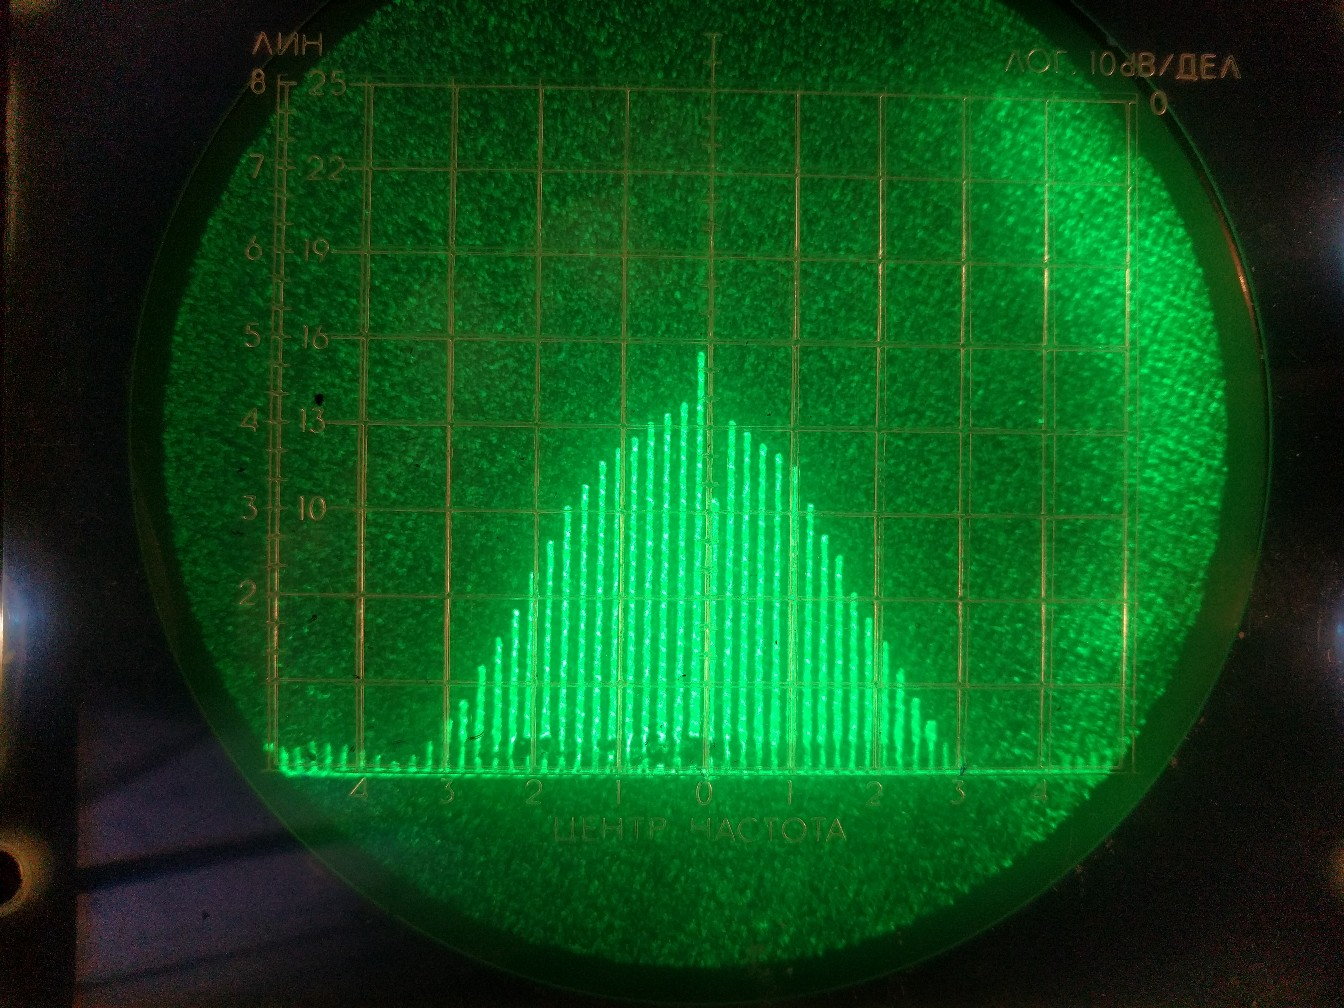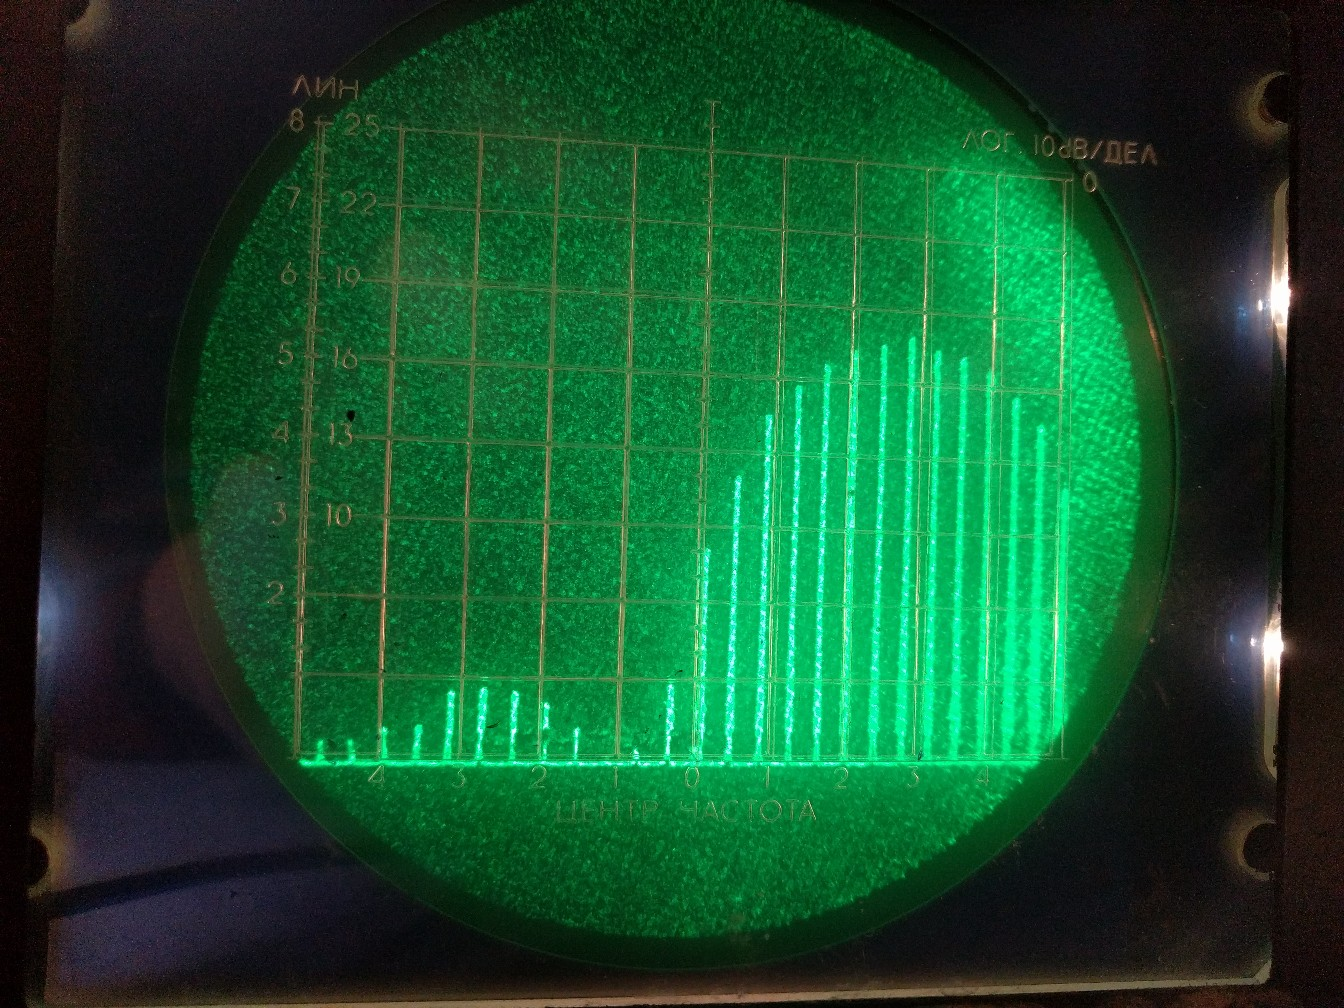

   f, kHz  delta_nu, kHz
0     1.0       0.937500
1     2.0       1.785714
2     3.0       2.500000
3     4.0       3.333333
4     5.0       5.000000
5     1.6       1.363636
6     2.6       2.250000


<ErrorbarContainer object of 3 artists>

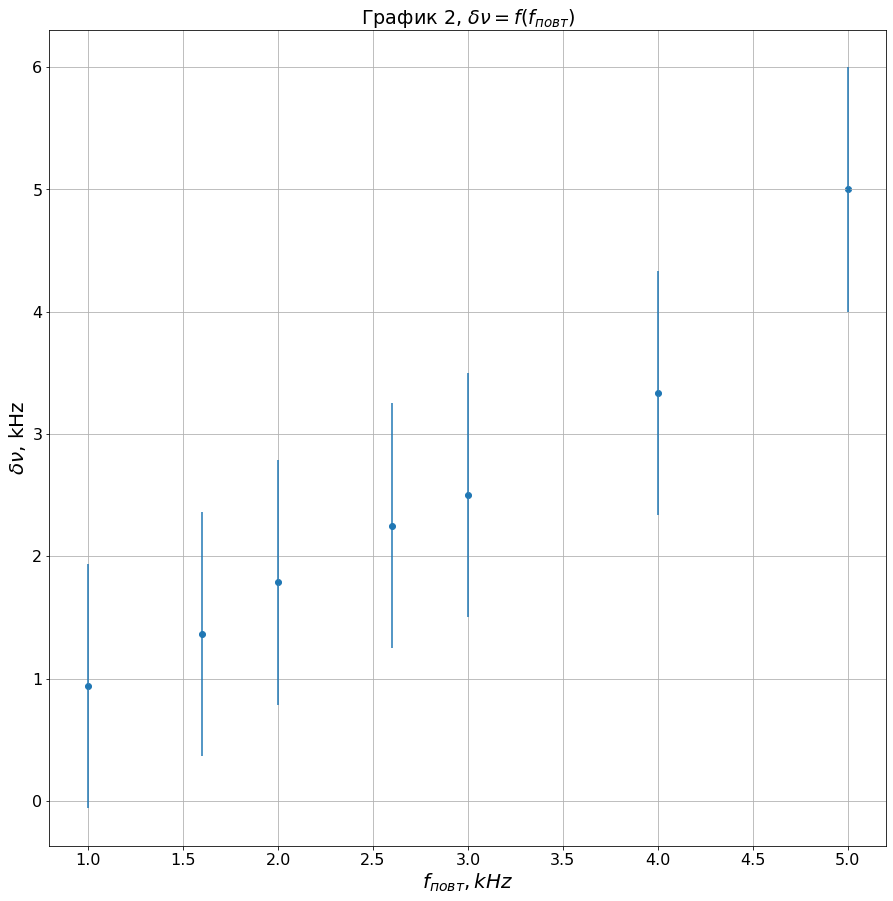

In [15]:
f = pd.Series([1, 2, 3, 4, 5, 1.6, 2.6])
delta_nu = m * pd.Series([0.1875, 1 / (14 / 5), 1 / (10 / 5), 1 / (6 / 4), 1, 1 / (11 / 3), 1 / (10 / 4.5)]) / 1000

# Зависимость ширины спектра от частоты повторения импульсов.
table2 = pd.DataFrame({
    'f, kHz': f,
    'delta_nu, kHz' : delta_nu
})

print(table2)

# Create figure.
plt.figure(figsize=(15, 15))

# Sign axises and the graph.
plt.title('График 2, $\delta ν = f(f_{повт})$')
plt.ylabel("$\delta ν$, kHz", fontsize = 20)
plt.xlabel("$f_{повт}, kHz$", fontsize = 20)

plt.scatter(f, delta_nu)

# Activate grid.
plt.grid(b=True, which='major', axis='both', alpha=1)

# Calculate errors.
sigma_delta_nu = [m / 1000 * 0.2 for i in range(len(delta_nu))]

plt.errorbar(f, delta_nu, yerr=sigma_delta_nu, xerr=0.0, fmt='.') 

**Вывод**: при стремлении $f_{повт}$ к 0 вид спектра меняется: $\delta \nu$ становится всё больше.  

2.4) Сравним зарисованные на кальку спектры:

а) прямоугольных импульсов при одинаковых периодах и разных длительностях импульса $\tau$;

б) цугов при одинаковых $\tau$ и разных периодах $T$;

в) цугов и прямоугольных импульсов при одинаковых значениях $\tau$ и $T$.

Имеем:
а) Видим, что $\delta \nu$ одинаковые, а вот $\Delta \nu$ отличаются в два раза. Это совпадает и с теорией, так как длительность импульса обратно пропорциональна нулям $a_n$.

б) Видим, что $\delta \nu$ в два раза больше и $\Delta \nu$ тоже. Это согласуются с теорией, так как частота развёрстки не менялась.

в) Видим, что $\Delta \nu$ и $\delta \nu$ совпадают, и значения для цугов сдвинуты на одинаковую величину, как и должно быть. Но почему-то значения $a_n$ для цугов меньше в полтора раза.

## Задание № 3
**Исследование спектра гармонических сигналов, модулированных по амплитуде**

3.1) Исследуем зависимость отношения амплитуды боковой линии спектра к амплитуде основной линии ($a_{бок}/а_{осн}$) от глубины модуляции и построим график $\frac{a_{бок}}{a_{осн}} = f(m)$

In [16]:
def mnk_method(val_x, val_y):
    '''
    Принимает Series точек по x и Series по y (равны)
    Возвращает list из b, a, sigma_b, sigma_a
    '''
    b = ( (val_x * val_y).mean() - val_x.mean() * val_y.mean() )/( (val_x**2).mean() - val_x.mean()**2 )
    
    a = val_y.mean() - b * val_x.mean()
    
    sigma_b = 1 / val_x.size * ( ( (val_y**2).mean() - val_y.mean()**2 ) / \
                           ( (val_x**2).mean() - val_x.mean()**2 ) - b**2 )**(1/2)
    
    sigma_a = sigma_b * ( (val_x**2).mean() - val_x.mean()**2 )**(1/2)
    
    return {'b' : b, 'a' : a, 'sigma_b' : sigma_b, 'sigma_a' : sigma_a}

0    0.497863
1    0.213675
2    0.143162
3    0.590000
4    0.143162
5    0.285714
6    0.277083
7    0.229167
dtype: float64
   2*A_max, divisions  2*A_min, divisions  a_side / a_basic, 1      m, 1
0                  24                 2.0             0.497863  0.846154
1                  19                 5.0             0.213675  0.583333
2                  16                 6.0             0.143162  0.454545
3                  27                 1.5             0.590000  0.894737
4                  17                 7.0             0.143162  0.416667
5                  21                 4.5             0.285714  0.647059
6                  24                 3.5             0.277083  0.745455
7                  24                 3.0             0.229167  0.777778
МНК: {'b': 0.9268196958380917, 'a': 0.3950070323436067, 'sigma_b': 0.06991086325918239, 'sigma_a': 0.010648323389221837}


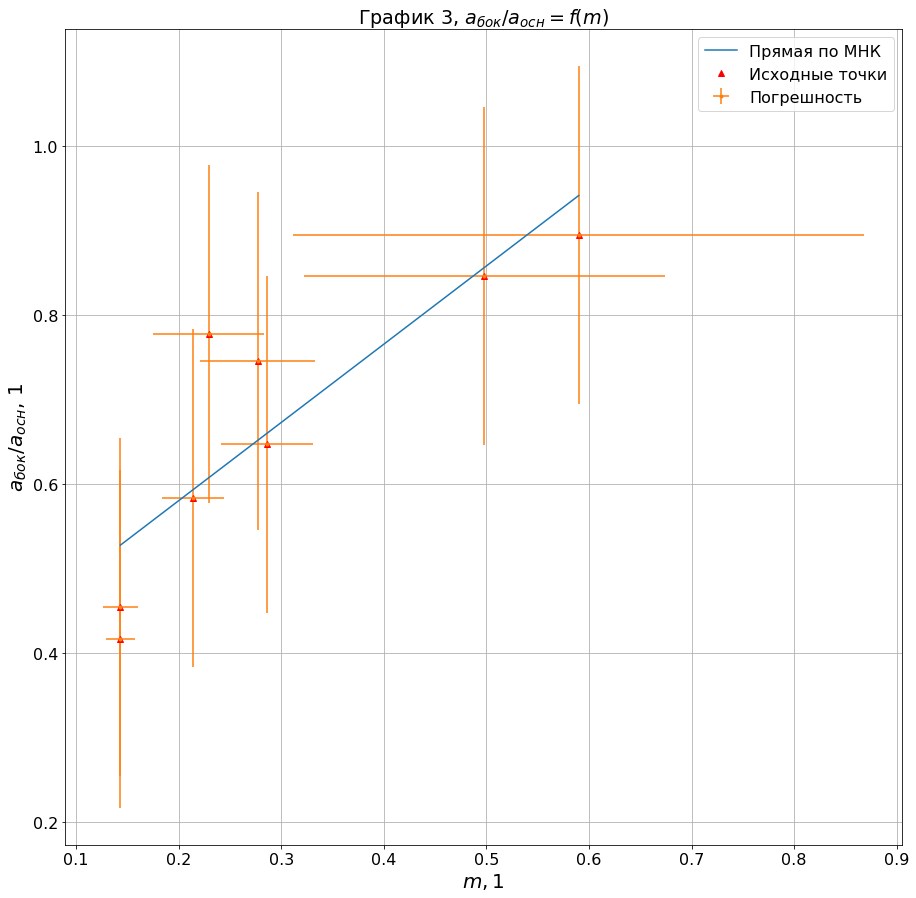

In [28]:
A_max_d = pd.Series([24, 19, 16, 27, 17, 21, 24, 24])
A_min_d = pd.Series([2, 5, 6, 1.5, 7, 4.5, 3.5, 3])
a_side = pd.Series([2.33, 1, 0.67, 2.95, 0.67, 1.40, 1.33, 1.1])
a_basic = pd.Series([4.68, 4.68, 4.68, 5.00, 4.68, 4.9, 4.8, 4.8])
print(a_side / a_basic)

# Зависимость отношения амплитуды боковой линии спектра
# к амплитуде основной линии от глубины модуляции.
table3 = pd.DataFrame({
    '2*A_max, divisions': A_max_d,
    '2*A_min, divisions': A_min_d,
    'a_side / a_basic, 1' : a_side / a_basic,
    'm, 1' : (A_max_d - A_min_d) / (A_max_d + A_min_d)
})

print(table3) 

res_val = mnk_method(table3['a_side / a_basic, 1'], table3['m, 1'])
val_x = table3['a_side / a_basic, 1']
val_y = table3['m, 1']

print('МНК:', res_val)

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.size'] = 16 # Управление стилем, в данном случаем - размером шрифта 
 # Создаем фигуру
plt.figure(figsize=(15,15))

# Подписываем оси и график
plt.title('График 3, $a_{бок} / a_{осн} = f(m)$')
plt.ylabel("$a_{бок} / a_{осн}$, 1", fontsize = 20)
plt.xlabel("$m, 1$", fontsize = 20)



# Добавляем данные
x = np.linspace(val_x.min(), val_x.max(), 100)
y = res_val['b'] * x + res_val['a']
plt.plot(x,y, label="Прямая по МНК")

# Еще данные
x2 = val_x
y2 = val_y
plt.plot(x2, y2, 'r^', label='Исходные точки')
# 'r^' - задает стиль линии - красные (red) треугольники (^), подробнее в документации

# Данные с ошибками
# mu = np.sin(x2)
# sigma = np.abs(mu)**0.5
# y2 = np.random.normal(mu, sigma)
# Можно рисовать ошибки
sigma_A = [0.5 for i in range(len(table3['2*A_min, divisions']))]
sigma_A /= table3['2*A_min, divisions'] # A_max isn't considered because it has much lower error.
sigma_m = math.sqrt(2) * sigma_A
plt.errorbar(x2, y2, yerr=0.2, xerr=val_x * sigma_m, fmt='.', label='Погрешность') 

# Активируем сетку
plt.grid(b=True, which='major', axis='both', alpha=1)
plt.grid(b=True, which='minor', axis='both', alpha=0.5)

# Активируем легенду графика
plt.legend()
# Внимание, запускаете вашу программу как сценарий, то что бы показать график
# Используйте эту команду
## plt.show()

In [26]:
from math import pi

phi = math.atan(res_val['b']) / pi * 180
sigma_phi = res_val['sigma_b'] / res_val['b'] * phi
print('Значение угла наклона: ({:0.6f} ± {:0.1f})°'.format(phi, sigma_phi))

Значение угла наклона: (42.824961 ± 3.2)°


Рассчитаем значение угла наклона по формуле и сравним с полученным результатом:
$a_{бок} / a_{осн} = \frac{m}{2}$, тогда тангенс угла наклона есть $0.5$, а сам угол суть $45^{\circ}$.

**Вывод:** значения совпадают в пределах погрешности.